In [483]:
import pandas as pd 
import numpy as np 
import seaborn as sns # graphics with data frames
import matplotlib.pyplot as plt # create graphics

#get the keywords
import nltk 
from nltk.corpus import stopwords
import wordcloud
from wordcloud import WordCloud, STOPWORDS

# create a keyword bag use “count vectorize” from the Scikit-learn library
# pip install scikit-learn
from sklearn.feature_extraction.text import CountVectorizer

#import the logistic regression model
from sklearn.linear_model import LogisticRegression

In [484]:
data = pd.read_csv('flipkart_product.csv', encoding="unicode_escape")
#df = pd.read_csv('flipkart_product.csv')

In [485]:
data

,ProductName,Price,Rate,Review,Summary
0,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,"??3,999",5,Super!,Great cooler.. excellent air flow and for this...
1,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,"??3,999",5,Awesome,Best budget 2 fit cooler. Nice cooling
2,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,"??3,999",3,Fair,The quality is good but the power of air is de...
3,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,"??3,999",1,Useless product,Very bad product it's a only a fan
4,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,"??3,999",3,Fair,Ok ok product
...,...,...,...,...,...
189869,"NIVEA Soft Light Moisturizer for Face, Hand & ...",â¹142,5,Terrific,Thanks
189870,"NIVEA Soft Light Moisturizer for Face, Hand & ...",â¹142,5,Terrific,Good
189871,"NIVEA Soft Light Moisturizer for Face, Hand & ...",â¹142,5,Just wow!,Super
189872,"NIVEA Soft Light Moisturizer for Face, Hand & ...",â¹142,4,Worth the money,Good


# Columns rename  

<AxesSubplot:>

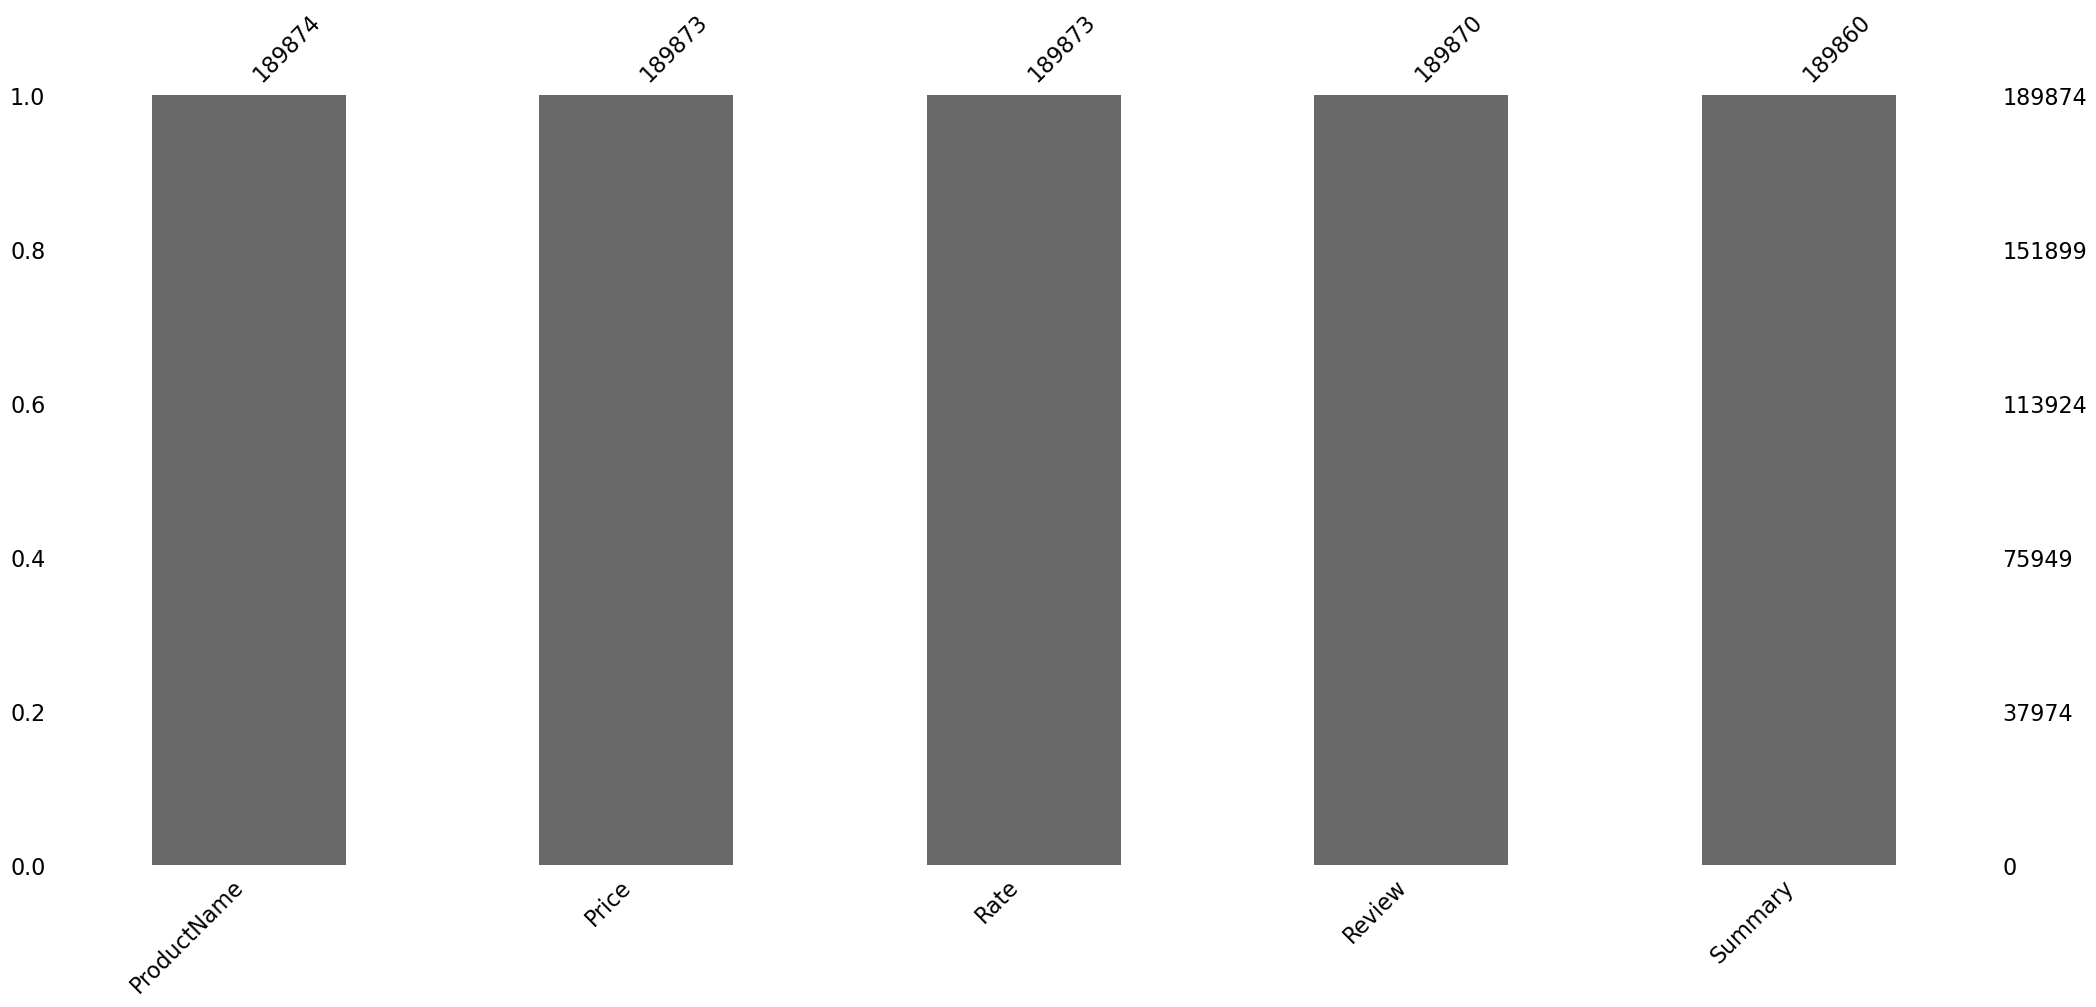

In [486]:
missingno.bar(data)

In [487]:
data.isna().sum()

ProductName     0
Price           1
Rate            1
Review          4
Summary        14
dtype: int64

In [488]:
data.dropna()

,ProductName,Price,Rate,Review,Summary
0,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,"??3,999",5,Super!,Great cooler.. excellent air flow and for this...
1,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,"??3,999",5,Awesome,Best budget 2 fit cooler. Nice cooling
2,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,"??3,999",3,Fair,The quality is good but the power of air is de...
3,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,"??3,999",1,Useless product,Very bad product it's a only a fan
4,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,"??3,999",3,Fair,Ok ok product
...,...,...,...,...,...
189868,"NIVEA Soft Light Moisturizer for Face, Hand & ...",â¹142,5,Terrific,Good
189869,"NIVEA Soft Light Moisturizer for Face, Hand & ...",â¹142,5,Terrific,Thanks
189870,"NIVEA Soft Light Moisturizer for Face, Hand & ...",â¹142,5,Terrific,Good
189871,"NIVEA Soft Light Moisturizer for Face, Hand & ...",â¹142,5,Just wow!,Super


In [489]:
data.isnull().sum()

ProductName     0
Price           1
Rate            1
Review          4
Summary        14
dtype: int64

# Remove character

In [490]:
#remove character with undefined name
import re
def rmv_char(text):
  text = str(text)
  text = re.sub('[^a-zA-Z0-9(/)]',' ', text)
  text = re.sub('\s+',' ', text) #remove whitespace
  return text


In [491]:
data['Summary'] = data['Summary'].apply(lambda x: rmv_char(x).lower())
data['Review'] = data['Review'].apply(lambda x: rmv_char(x).lower())
data['Price']= data['Price'].apply(lambda x:rmv_char(x)) 

# Produto

In [492]:
data['ProductName'].value_counts()

MILTON Thermosteel Flip Lid 500 ml FlaskÂ Â (Pack of 1, Silver, Steel)                                                     9278
cello Pack of 18 Opalware Cello Dazzle Lush Fiesta Opalware Dinner Set, 18 Pieces Dinner SetÂ Â (White, Microwave Safe)    8870
Home Sizzler 153 cm (5.02 ft) Polyester Room Darkening Window Curtain (Pack Of 2)Â Â (Floral, Brown)                       4350
CMerchants Multi Organiser BLue-4 Book Shelf Metal Open Book ShelfÂ Â (Finish Color - BLUE, DIY(Do-It-Yourself))           2399
Kadio Analog 20 cm X 20 cm Wall ClockÂ Â (Beige, With Glass, Standard)                                                     2380
                                                                                                                           ... 
38024PP25 Minimalists Analog Watch  - For Men                                                                                 9
LS2727 Avatar Day and Date Functioning Crocodile Strap Analog Analog Watch  - For Men                   

# identify null values

In [493]:
data['Price'].isnull().sum()

0

In [494]:
data["Price"].fillna("10", inplace = True)
data['Price'].isnull().sum()

0

In [495]:
print(data['Price'].value_counts())

 1 299                                                    10175
 648                                                       9278
 299                                                       8335
 1 599                                                     3499
 13 999                                                    2828
                                                          ...  
 488                                                         10
Bajaj DX 2 L/W Dry Iron                                       1
Nova Plus Amaze NI 10 1100 W Dry Iron (Grey Turquoise)        1
Pigeon Favourite Electric Kettle (1 5 L Silver Black)         1
nan                                                           1
Name: Price, Length: 477, dtype: int64


In [496]:
# extract the first 3 positions of the "price" since they are strange characters
for i in range(len(data)):
    data.loc[i, 'Preços'] = data.iloc[i].Price[3:]
    
#delet columns

del(data['Price'])
data.head()

,ProductName,Rate,Review,Summary,Preços
0,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,5,super,great cooler excellent air flow and for this p...,999
1,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,5,awesome,best budget 2 fit cooler nice cooling,999
2,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,3,fair,the quality is good but the power of air is de...,999
3,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,1,useless product,very bad product it s a only a fan,999
4,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,3,fair,ok ok product,999


In [497]:
print(data['Preços'].value_counts())

9                                                      55528
499                                                    12550
299                                                    11912
8                                                      11376
5                                                       9994
                                                       ...  
345                                                       10
909                                                       10
aj DX 2 L/W Dry Iron                                       1
eon Favourite Electric Kettle (1 5 L Silver Black)         1
a Plus Amaze NI 10 1100 W Dry Iron (Grey Turquoise)        1
Name: Preços, Length: 151, dtype: int64


In [498]:
data['Preços'] = data['Preços'].replace({'aj DX 2 L/W Dry Iron': 10})
data['Preços'] = data['Preços'].replace({'a Plus Amaze NI 10 1100 W Dry Iron?ÿ?ÿ(Grey & Turquoise)': 10})
data['Preços'] = data['Preços'].replace({'eon Favourite Electric Kettle?ÿ?ÿ(1.5 L, Silver, Black)': 10})

print(data['Preços'].value_counts())

9                                                      55528
499                                                    12550
299                                                    11912
8                                                      11376
5                                                       9994
                                                       ...  
345                                                       10
909                                                       10
10                                                         1
eon Favourite Electric Kettle (1 5 L Silver Black)         1
a Plus Amaze NI 10 1100 W Dry Iron (Grey Turquoise)        1
Name: Preços, Length: 151, dtype: int64


In [499]:
print(data['Rate'].value_counts())

5                                                              108694
4                                                               39653
1                                                               19607
3                                                               15681
2                                                                6234
Pigeon Favourite Electric Kettle?ÿ?ÿ(1.5 L, Silver, Black)          1
Bajaj DX 2 L/W Dry Iron                                             1
Nova Plus Amaze NI 10 1100 W Dry Iron?ÿ?ÿ(Grey & Turquoise)         1
s                                                                   1
Name: Rate, dtype: int64


In [500]:
print(data['Rate'].isnull().sum())

1


In [501]:
#sustituir valores nulos por el valor '10'
data["Rate"].fillna("1", inplace = True)
#identificar valores nulos
data['Rate'].isnull().sum()


0

In [502]:
data['Rate'] = data['Rate'].replace({'Pigeon Favourite Electric Kettle?ÿ?ÿ(1.5 L, Silver, Black)': 1})
data['Rate'] = data['Rate'].replace({'Bajaj DX 2 L/W Dry Iron': 1})
data['Rate'] = data['Rate'].replace({'Nova Plus Amaze NI 10 1100 W Dry Iron?ÿ?ÿ(Grey & Turquoise)': 1})
data['Rate'] = data['Rate'].replace({'Bajaj DX 2 L/W Dry Iron': 1})
data['Rate'] = data['Rate'].replace({'s': 1})

print(data['Rate'].value_counts())

5    108694
4     39653
1     19608
3     15681
2      6234
1         4
Name: Rate, dtype: int64


In [503]:
print(data['Review'].value_counts())

nan                                    20866
wonderful                               8918
awesome                                 5510
worth every penny                       5464
classy product                          5438
                                       ...  
great product with this price range        1
best juicer                                1
fast delivery                              1
avg product                                1
well                                       1
Name: Review, Length: 1180, dtype: int64


In [504]:
data['Review'] = data['Review'].replace({'nan': 'others'})
print(data['Review'].value_counts())

others                                 20866
wonderful                               8918
awesome                                 5510
worth every penny                       5464
classy product                          5438
                                       ...  
great product with this price range        1
best juicer                                1
fast delivery                              1
avg product                                1
well                                       1
Name: Review, Length: 1180, dtype: int64


In [505]:
print(data['Summary'].value_counts())

good                                                                        15205
nice                                                                         8384
good product                                                                 5828
nice product                                                                 4185
super                                                                        2802
                                                                            ...  
it s a beautiful watch i just love it                                           1
okh                                                                             1
looks good but too small                                                        1
good good good prodect                                                          1
it s a nice product thanks very much to flipcart for the speedy service         1
Name: Summary, Length: 88857, dtype: int64


In [506]:
# var_num = []
# for c in data.columns:
#     t = str(data[c].dtype)
#     if "int64" in t or "float64" in t:
#         var_num.append(c)
# pd.DataFrame(var_num)

In [507]:
var_cual = []

for c in data.columns:
    t = str(data[c].dtype)
    if "object" in t:
        var_cual.append(c)
pd.DataFrame(var_cual)

,0
0,ProductName
1,Rate
2,Review
3,Summary
4,Preços


In [508]:
var_cual.remove('ProductName')
var_cual.remove('Review')
var_cual.remove('Summary')
var_cual.remove('Preços')

var_cual

['Rate']

In [509]:
# graphs and frequency tables of all qualitative variables:
for i in var_cual:
    
    print("*************************************************")
    print("Variable = "+i)
    print("*************************************************")
    
    # 1. The frequency table of the variable i
    pct = pd.DataFrame(data[i].value_counts(normalize=True))
    pct.columns = ['Frecuencias Relativas']
    pct["Frecuencias Absolutas"] = data[i].value_counts()
    print(pct)

*************************************************
Variable = Rate
*************************************************
   Frecuencias Relativas  Frecuencias Absolutas
5               0.572453                 108694
4               0.208838                  39653
1               0.103268                  19608
3               0.082586                  15681
2               0.032832                   6234
1               0.000021                      4


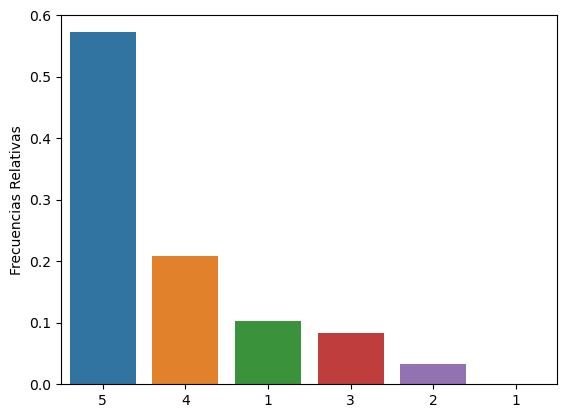

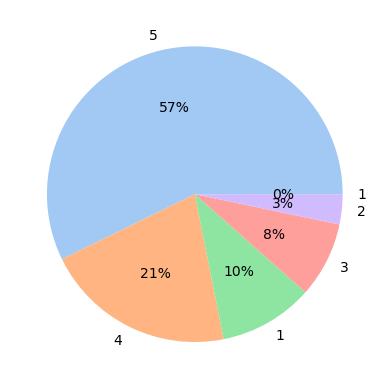

*************************************************
*************************************************


In [510]:
    # 2. Barplot of the variable i
    sns.barplot(x=pct.index, y='Frecuencias Relativas', data=pct)
    plt.show()
    
    # 3. Pieplot of variable i
    frec_abs = data[i].value_counts() #I record the absolute frequencies
    labels = data[i].value_counts().index # I take the names of the groups of qualitative variable i
    colors = sns.color_palette('pastel')[0:len(labels)] # I define the colors according to the seaborn pastel palette
    plt.pie(frec_abs, labels = labels, colors = colors, autopct='%.0f%%') # pie plot and show the percentages
    plt.show()
    
    print("*************************************************")
    print("*************************************************")

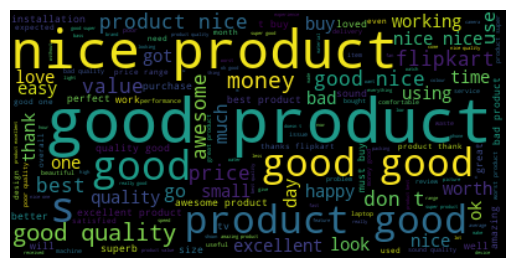

In [511]:
#Creamos la lista de palabras
stopwords = set(STOPWORDS)
stopwords.update(["br", "href"])
text = " ".join(review for review in data.Summary)
wordcloud = WordCloud(stopwords=stopwords).generate(text)

plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis("off")
plt.show()

In [512]:
# Classifier Commentary
data['Rate'] = data['Rate'].astype('int32')

In [513]:
print(data['Rate'].value_counts())

5    108694
4     39653
1     19612
3     15681
2      6234
Name: Rate, dtype: int64


In [514]:
# classify the positive and negative comments, with a rating greater than 2 are positive
for i in range(len(data)):
    if data.iloc[i]['Rate'] > 2:
        data.loc[i, 'Sentimentos'] = '1'
    else:
        data.loc[i, 'Sentimentos'] = '0'

print(data['Sentimentos'].value_counts())

1    164028
0     25846
Name: Sentimentos, dtype: int64


In [515]:
positivo = data[data['Sentimentos'] == '1']
negativo = data[data['Sentimentos'] == '0']

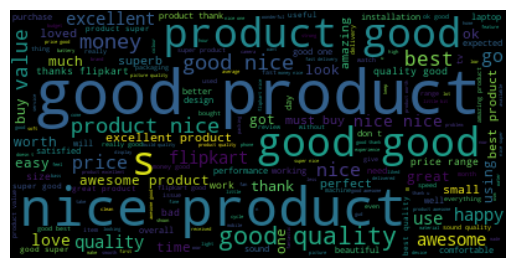

In [516]:
stopwords = set(STOPWORDS)
stopwords.update(["br", "href"])
txt_positivo = " ".join(review for review in positivo.Summary)
wordcloud_positivo = WordCloud(stopwords=stopwords).generate(txt_positivo)

plt.imshow(wordcloud_positivo, interpolation = 'bilinear')
plt.axis("off")
plt.show()


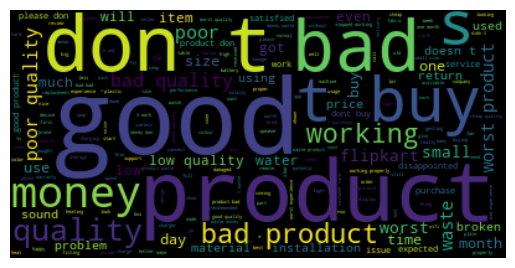

In [517]:
#Creamos la lista de palabras negativas
stopwords = set(STOPWORDS)
stopwords.update(["br", "href"])
txt_negativo = " ".join(review for review in negativo.Summary)
wordcloud_negativo = WordCloud(stopwords=stopwords).generate(txt_negativo)

plt.imshow(wordcloud_negativo, interpolation = 'bilinear')
plt.axis("off")
plt.show()

# felling and exploration  

In [518]:
var_cual = []
for c in data.columns:
    t = str(data[c].dtype)
    if "object" in t:
        var_cual.append(c)
pd.DataFrame(var_cual)

,0
0,ProductName
1,Review
2,Summary
3,Preços
4,Sentimentos


In [519]:
var_cual.remove('ProductName')
var_cual.remove('Review')
var_cual.remove('Summary')
var_cual.remove('Preços')
var_cual

['Sentimentos']

*************************************************
Variable = Sentimentos
*************************************************
   Frecuencias Relativas  Frecuencias Absolutas
1               0.863878                 164028
0               0.136122                  25846


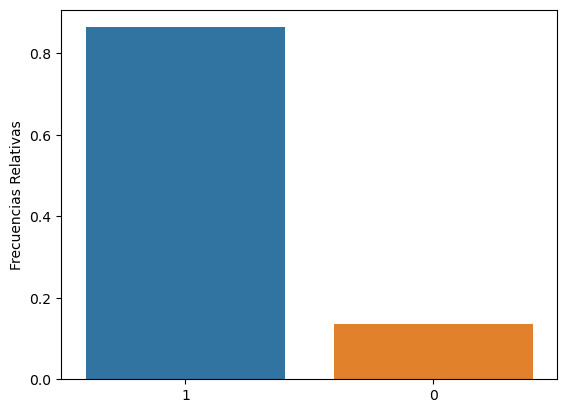

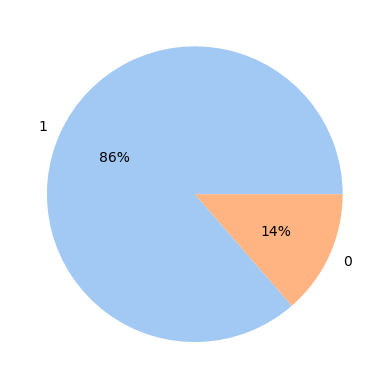

*************************************************
*************************************************


In [520]:
# graphs and frequency tables of all qualitative variables:
for i in var_cual:
    
    print("*************************************************")
    print("Variable = "+i)
    print("*************************************************")
    
    # 1. The frequency table of the variable i
    pct = pd.DataFrame(data[i].value_counts(normalize=True))
    pct.columns = ['Frecuencias Relativas']
    pct["Frecuencias Absolutas"] = data[i].value_counts()
    print(pct)
    
     # 2. Barplot of the variable i
    sns.barplot(x=pct.index, y='Frecuencias Relativas', data=pct)
    plt.show()
    
    # 3. Pieplot of variable i
    frec_abs = data[i].value_counts() #I record the absolute frequencies
    labels = data[i].value_counts().index # I take the names of the groups of qualitative variable i
    colors = sns.color_palette('pastel')[0:len(labels)] # I define the colors according to the seaborn pastel palette
    plt.pie(frec_abs, labels = labels, colors = colors, autopct='%.0f%%') # pie plot and show the percentages
    plt.show()
    
    print("*************************************************")
    print("*************************************************")

# build model of fellings


In [521]:
#create a new df with description and sentiment columns
df_modelo = data[['Summary','Sentimentos']]
df_modelo.shape

(189874, 2)

In [522]:
df_modelo.head()

,Summary,Sentimentos
0,great cooler excellent air flow and for this p...,1
1,best budget 2 fit cooler nice cooling,1
2,the quality is good but the power of air is de...,1
3,very bad product it s a only a fan,0
4,ok ok product,1


# datas de entrenamiento and test

In [523]:
#dividr los datos en datos de entrenamiento y datos de test
index = df_modelo.index

df_modelo['random'] = np.random.randn(len(index))
train = df_modelo[df_modelo['random'] <= 0.8]
test = df_modelo[df_modelo['random'] > 0.8]
print('Los datos de entrenamiento son:', len(train))
print('Los datos de validación son:', len(test))

Los datos de entrenamiento son: 149873
Los datos de validación son: 40001


C:\Users\breno\AppData\Local\Temp\ipykernel_10028\3805094305.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_modelo['random'] = np.random.randn(len(index))


# create a keyword bag

In [524]:
# from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(token_pattern=r'\b\w+\b')
train_matrix = vectorizer.fit_transform(train['Summary'])
test_matrix = vectorizer.transform(test['Summary'])

# import logistic regression model

In [525]:
# from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

# split the input and output variable

In [526]:
X_train = train_matrix
X_test = test_matrix
y_train = train['Sentimentos']
y_test = test['Sentimentos']

# fit model

In [527]:
lr.fit(X_train,y_train)

C:\Users\breno\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

# make the predictions

In [528]:
predictions = lr.predict(X_test)
predictions

array(['1', '1', '1', ..., '1', '1', '1'], dtype=object)

# tests with TEST data

The main metrics:: 
[[ 4196   827]
 [ 1248 33730]]


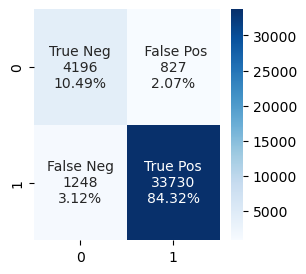

In [529]:

from sklearn.metrics import confusion_matrix

print("The main metrics:: ")
confusion_matrix(predictions,y_test)

cf_matrix = confusion_matrix(predictions,y_test)
print(cf_matrix)
    #plt.title('Confusion Matrix')
    #sns.heatmap(cf_matrix, annot=True, fmt='', cmap='Blues')
    # define the values ​​to display the confusion matrix
    
plt.figure(figsize=(3, 3))    
group_names = ['True Neg', ' False Pos', 'False Neg', 'True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                cf_matrix.flatten()]

group_percentages = ['{0:.2%}'.format(value) for value in
                cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')
plt.show()

